In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True, connected=True)

# Load the CSV files
alpha1 = pd.read_csv("alpha_short_rsi.csv", parse_dates=['Date'])
alpha2 = pd.read_csv("alpha_rsi_long.csv", parse_dates=['Date'])


# Merge the DataFrames sequentially
merged = pd.merge(alpha1, alpha2, on=["Date", "Close"], how="inner")


# Display the first 10 rows
merged.head(10)

Loading ITables v2.5.2 from the internet... (need help?)


In [3]:
import matplotlib.pyplot as plt

In [4]:
merged

Loading ITables v2.5.2 from the internet... (need help?)


In [15]:
for i in range(len(merged)):
    if merged['pos_x'].iat[i] + merged['pos_y'].iat[i] >= 1:
        merged['pos'].iat[i] = 1
    elif merged['pos_x'].iat[i] + merged['pos_y'].iat[i] <= -1:
        merged['pos'].iat[i] = -1
    else:
        merged['pos'].iat[i] = 0

In [17]:
merged

Loading ITables v2.5.2 from the internet... (need help?)


In [18]:
from F4 import BacktestInformation

In [19]:
# merged['pos'] = merged['pos_x'] + merged['pos_y']

Margin: 8.09
MDD: 121.3 (7.7%)

   Total trading quantity: 1668
         Profit per trade: 1.23
             Total Profit: 2988.3
         Profit after fee: 2047.9
 Trading quantity per day: 0.88
 Profit per day after fee: 1.08
                   Return: 0.17
          Profit per year: 268.78
                  HitRate: 0.41
          HitRate per day: 0.46


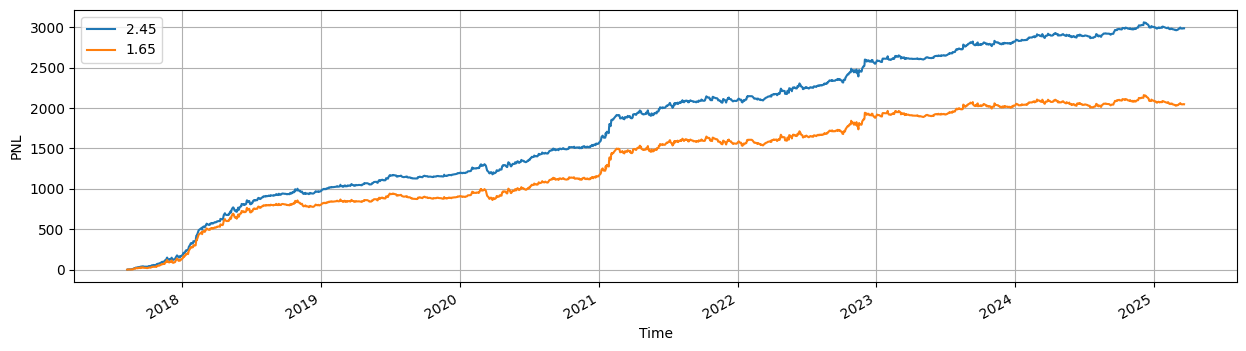

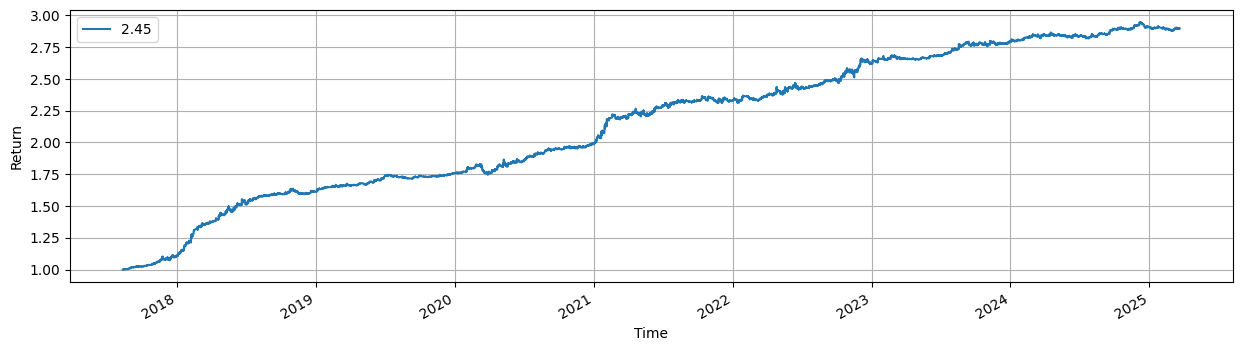

In [20]:
backtestInfo = BacktestInformation(merged['Date'], merged['pos'], merged['Close'], fee = 0.3) 
pnl = backtestInfo.Plot_PNL()